In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#Definindo o modelo

São 9 equações, que constituem um sistema de EDOs, representando a transmissão vertical da sífilis.
O sistema será solucionado pelo método RK4.

Descrição das Equações:

- Homens Suscetíveis;
- Mulheres Suscetíveis;
- Bebês Saudáveis (Nasceram das Gestantes Infectadas);
- Homens Infectados;
- Mulheres Infectadas;
- Gestantes Infectadas;
- Bebês Infectados (Nasceram das Gestantes Infectadas);
- Complicados (Indivíduos que evoluíram a doença);
- Recuperados.

A contaminação acontece devido ao contato sexual com algum indivíduo infectado. Como a intenção é verificar a transmissão vertical (quando ocorre da mãe infectada para o feto, durante a gestação), o modelo não prevê relações sexuais entre indivíduos do mesmo sexo.

In [2]:
def vert_sifilis(y, t, N, alpha1, alpha2, beta1, beta2, r1, r2, 
                              k, kbar, delta, deltabar, nu):
    
    Sm, Sf, Sb, Im, If, Ip, Ib, C, R = y
    
    dSmdt  = (-alpha1 * If * Sm) / N
    dSfdt  = (-alpha2 * Im * Sf) / N
    dSbdt  = (1 - kbar)*Ip
    dImdt  = (alpha1*If*Sm) / N - (r1*Im) - (beta1*Im)
    dIfdt  = (alpha2*Im*Sf) / N - (r2*If) - (beta2*If) 
    dIpdt  = (k*If) - (r2*Ip) - (beta2*Ip)
    dIbdt  = (kbar*Ip) - (deltabar*Ib)
    dCdt   = (beta1*Im) + (beta2*If) + (beta2*Ip) - (nu*C) - (delta*C)
    dRdt   = (r1*Im) + (r2*If) + (r2*Ip) + (nu*C)
    
    return dSmdt, dSfdt, dSbdt, dImdt, dIfdt, dIpdt, dIbdt, dCdt, dRdt

In [3]:
#parametros
alpha1   = 0.10115       #taxa de contato masculina
alpha2   = 0.06885       #taxa de contato feminina
beta1    = 0.008571      #taxa de progressao masculina
beta2    = 0.005714      #taxa de progressao feminina
r1       = (1/14)*2      #taxa de recuperacao masculina
r2       = (1/14)*2      #taxa de recuperacao feminina
k        = 0.174         #taxa de fertilidade
kbar     = 0.07          #taxa de contaminacao de bebes nascidos de Ip (v.a)
delta    = 0.0156        #taxa de mortalidade pela doenca
deltabar = 0.006307      #taxa de mortalidade pela doenca em bebes (v.a)
nu       = 1/21          #taxa de recuperação dos complicados

In [29]:
#condicoes iniciais
N = 100000

Sm0 = 50000
Sf0 = 50000
Sb0 = 0
Im0 = 1970
If0 = 1380
Ip0 = 1360
Ib0 = 0
C0  = 0
R0  = 0

#vetor populacao inicial
y0 = [Sm0, Sf0, Sb0, Im0, If0, Ip0, Ib0, C0, R0]

#tamanho do passo
dt = 0.1
time = np.arange(0, 12, dt)

In [30]:
#solucao da EDO
sol = odeint(vert_sifilis, y0, time, args=(N, alpha1, alpha2, beta1, beta2, r1, 
                                           r2, k, kbar, delta, deltabar, nu))

In [32]:
#função para calcular as populações acumuladas
#soma o valor encontrado em cada passo da solução
def cumulated_pop(vetor, vet_acumulada, k):
    soma = 0
    for num in vetor:
        soma += num*k
        vet_acumulada.append(soma)

In [33]:
IMC = []
IFC = []
IPC = []
IBC = []
DBC = []

cumulated_pop(sol[:, 3], IMC, 1)
cumulated_pop(sol[:, 4], IFC, 1)
cumulated_pop(sol[:, 5], IPC, 1)
cumulated_pop(sol[:, 6], IBC, 1)
cumulated_pop(sol[:, 6], DBC, deltabar)

#1 ano de contaminação da sífilis

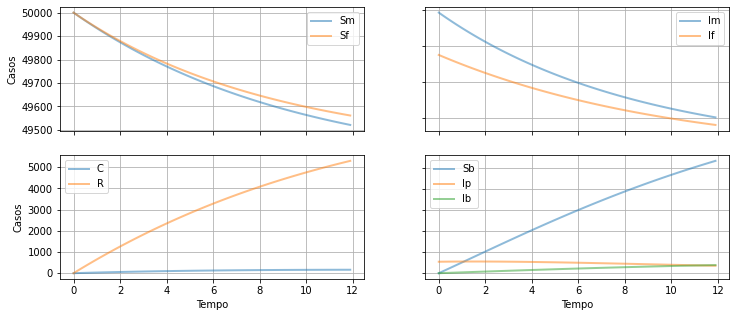

In [31]:
fig, axs = plt.subplots(2, 2, figsize=(12,5))
axs[0,0].plot(time, sol[:, 0], alpha=0.5, lw=2, label='Sm')
axs[0,0].plot(time, sol[:, 1], alpha=0.5, lw=2, label='Sf')
axs[1,1].plot(time, sol[:, 2], alpha=0.5, lw=2, label='Sb')
axs[0,1].plot(time, sol[:, 3], alpha=0.5, lw=2, label='Im')
axs[0,1].plot(time, sol[:, 4], alpha=0.5, lw=2, label='If')
axs[1,1].plot(time, sol[:, 5], alpha=0.5, lw=2, label='Ip')
axs[1,1].plot(time, sol[:, 6], alpha=0.5, lw=2, label='Ib')
axs[1,0].plot(time, sol[:, 7], alpha=0.5, lw=2, label='C')
axs[1,0].plot(time, sol[:, 8], alpha=0.5, lw=2, label='R')

for ax in axs.flat:
    ax.set(xlabel='Tempo', ylabel='Casos')

#deixa x-label abaixo dos gráficos e y-label a direita
for ax in axs.flat:
    ax.label_outer()

axs[0,0].legend()
axs[0,0].grid()
axs[0,1].legend()
axs[0,1].grid()
axs[1,0].legend()
axs[1,0].grid()
axs[1,1].legend()
axs[1,1].grid()
plt.show()

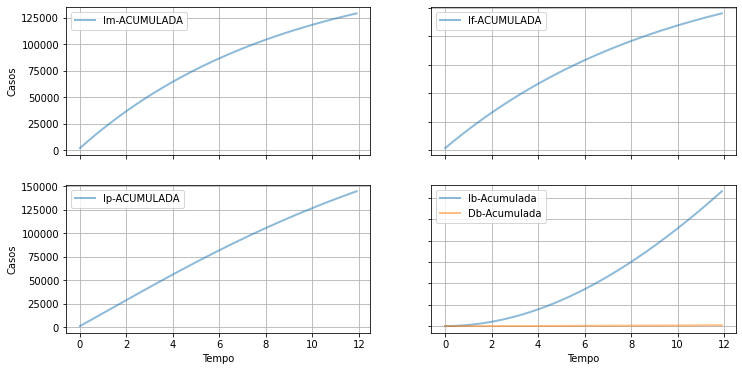

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(12,6))
axs[0,0].plot(time, IMC, alpha=0.5, lw=2, label='Im-ACUMULADA')
axs[0,1].plot(time, IFC, alpha=0.5, lw=2, label='If-ACUMULADA')
axs[1,0].plot(time, IPC, alpha=0.5, lw=2, label='Ip-ACUMULADA')
axs[1,1].plot(time, IBC, alpha=0.5, lw=2, label='Ib-Acumulada')
axs[1,1].plot(time, DBC, alpha=0.5, lw=2, label='Db-Acumulada')

for ax in axs.flat:
    ax.set(xlabel='Tempo', ylabel='Casos')

#deixa x-label abaixo dos gráficos e y-label a direita
for ax in axs.flat:
    ax.label_outer()

axs[0,0].legend()
axs[0,0].grid()
axs[0,1].legend()
axs[0,1].grid()
axs[1,0].legend()
axs[1,0].grid()
axs[1,1].legend()
axs[1,1].grid()
plt.show()

In [36]:
#Numero de casos em 1 ano
print(round(IMC[-1]), round(IFC[-1]), round(IPC[-1]), round(IBC[-1]), round(DBC[-1]))

129284 96073 144693 63143 398
129284 96073 144693 63143 398
